There is very little reason for doing any kind of statistical data analysis "the old fashioned (*read frequentist*) way" for any kind of *scientific* inquiry. The probabilistic, and more concretely bayesian paradigm is here to stay so I figure it would be probably be a good idea to get on board. Consequently one of my first year resolution is to make every possible excuse to give any analysis I happen to be doing a bayesian flavor, even if it's as simple as a linear regression. 
While one might readily think this to be overblown, a few good reasons to just stay on the bayesian bandwagon include
* making my assumptions (stated as priors) explicit, thereby transparent, debatable and revisable,
* avoiding the inclination for using black-box models
* and of course, the obligatory joy of provoking frequentist rancor, in particular in my dubious field of data science in oceanography, where a few frequentists are still in hiding.

This series of posts is about the basics and mostly inspired by Osvaldo Martin's excellent book, "Bayesian Analysis in Python". The goal is to start with Osvaldo's code and examples and extend them to dataset, situations *etc* that happen to cross my path. First things first, this is a review of the coin-flipping problem  and the use of  binomial likelihood with it's conjugate prior, the beta distribution 

In [5]:
from scipy import stats
import matplotlib.pyplot as pl
import numpy as np
import seaborn as sb
% matplotlib inline

We model the combinations of 3 possible numbers of coin tosses, n, and 3 possible probabilities of heads.
x will contain the possible outcomes from 0 to n. The binomial likelihood that gives the distribution of the data given a propability $\theta$ is written as $$ p\left(y|\theta \right) = \frac{N!}{\left(N-y\right)!y!} \theta^{y} \left(1-\theta \right)^{1-y} $$ where y is the number of heads.

In [2]:
n = [1, 2, 4]
p = [0.25, 0.5, 0.75]
x = np.arange(0,max(n)+1)
y = stats.binom(n[0],p=p[0]).pmf(x)

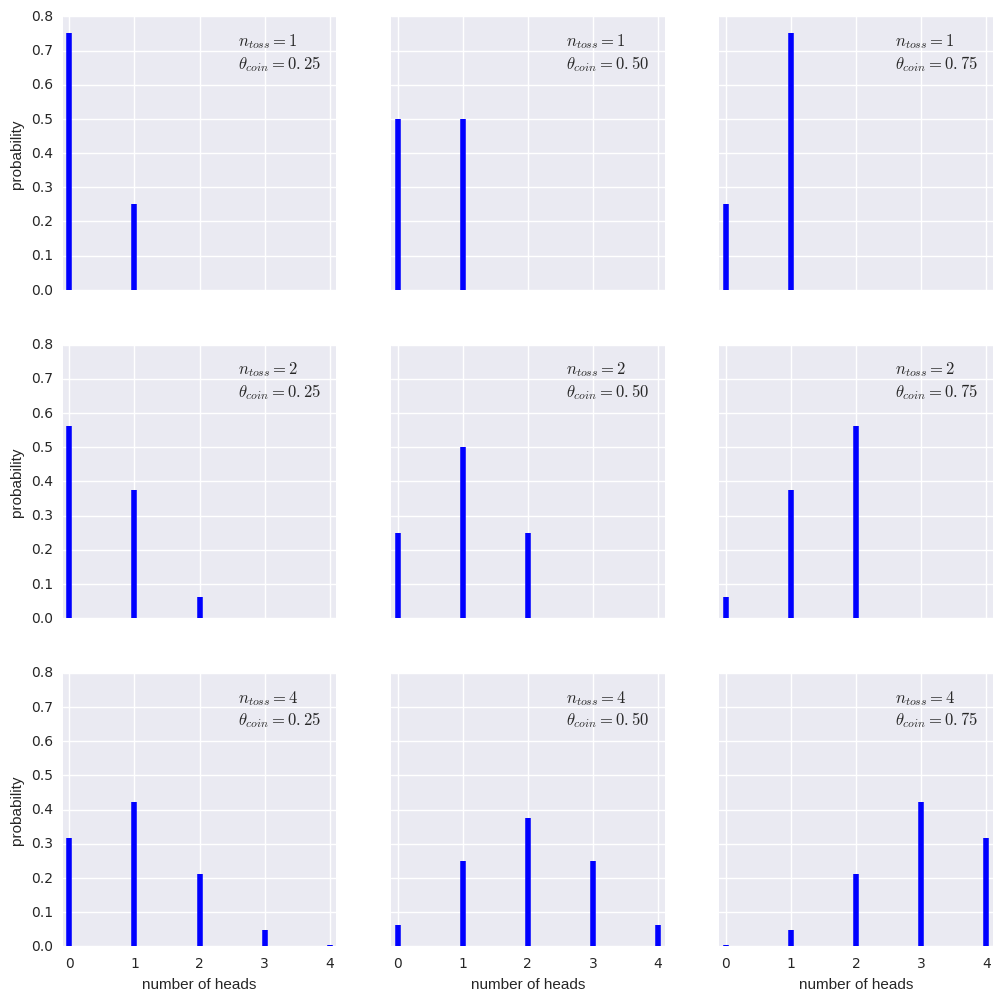

In [37]:
f,axs = pl.subplots(ncols=3,nrows=3,figsize=(12,12),sharex=True, sharey=True)
for i,ni in enumerate(n):
    for j, pj in enumerate(p):
        yij = stats.binom(n=ni,p=pj).pmf(x)
        axs[i,j].vlines(x,0,yij,color='b',lw=4)
        axs[i,j].set_xlim(xmin=-0.1, xmax=4.1)
        axs[i,j].plot(0,0,label=r"$n_{toss}=%d$" "\n" r"$\theta_{coin}=%.2f$" %(ni,pj),alpha=0)
        axs[i,j].legend(fontsize=12, loc='best')
        if i == 2:
            axs[i,j].set_xlabel("number of heads")
        if j == 0:
            axs[i,j].set_ylabel("probability")

A conjugate prior is very nice to have because it makes an analytical approach quite tractable. In the case of the binomial distribution, a conjugate prior happens to be the Beta distribution, $$p\left( \theta \right) = \frac{\Gamma \left( \alpha + \beta \right)}{\Gamma \left( \alpha \right) \Gamma \left( \beta \right)} \theta ^{ \alpha - 1} \left( 1 - \theta \right) ^{\beta - 1}$$

where $\Gamma$ is known as the **gamma** function. 

Two key points about the expression above are that
* it integrates to 1
* the Beta distribution's shape is controlled by the two parameters, $\alpha$ and $\beta$

Similarly to the likelihood distribution above, the figure below shows how the Beta prior's shape changes on account of $\alpha$ and $\beta$.

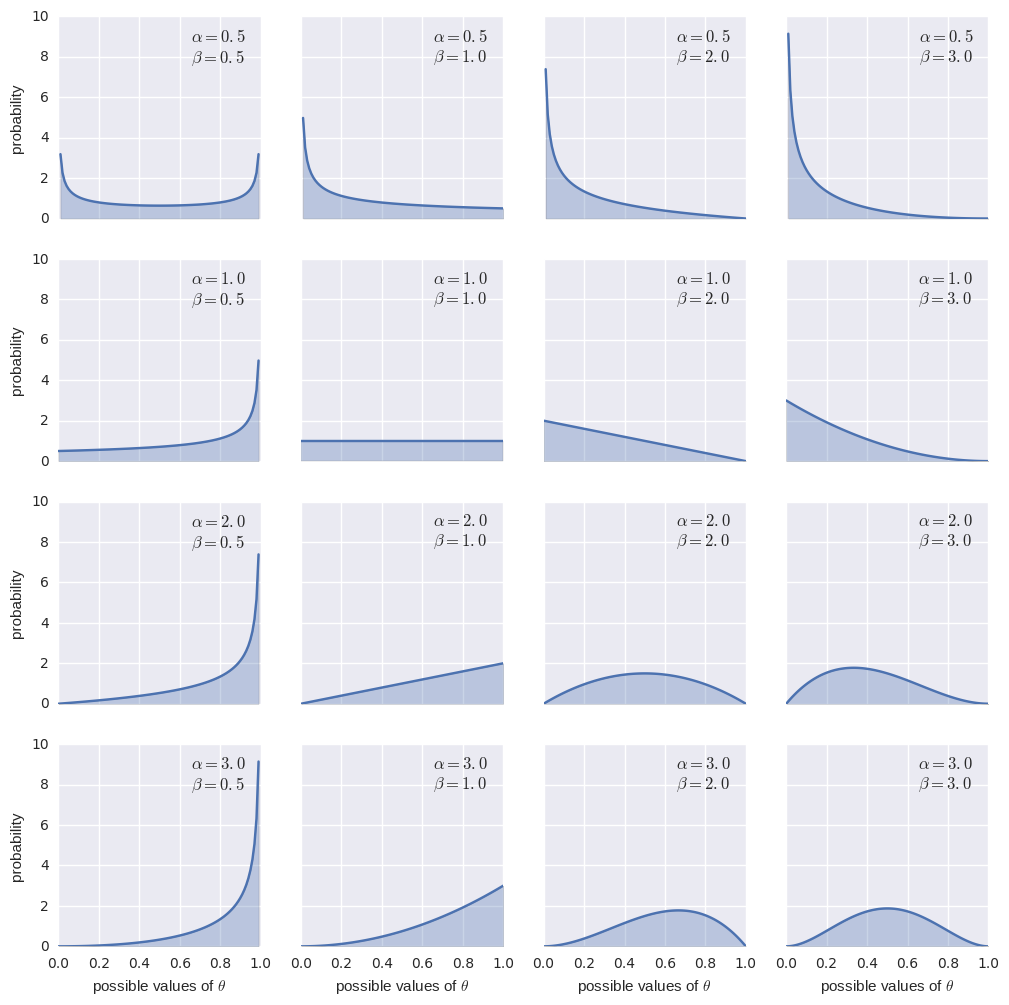

In [42]:
alphabeta = [0.5, 1, 2, 3] # both parameters will be drawn from this list
x = np.linspace(0,1,100)
f, axs = pl.subplots(nrows=4, ncols=4, figsize=(12,12), sharex=True, sharey=True)
for ri in range(4):
    for cj in range(4):
        a = alphabeta[ri]
        b = alphabeta[cj]
        y = stats.beta(a,b).pdf(x)
        axs[ri,cj].plot(x,y)
        axs[ri,cj].fill_between(x,0,y,alpha=0.3)
        axs[ri,cj].plot(0,0,label=r"$\alpha = %.1f$" "\n" r"$\beta = %.1f$" %(a, b), alpha=0)
        axs[ri,cj].legend(loc='best', fontsize=12)
        if ri == 3:
            axs[ri,cj].set_xlabel(r"possible values of $\theta$")
        if cj == 0:
            axs[ri,cj].set_ylabel("probability")

The posterior should be proportional to the prior multiplied by the likelihood $$p \left(\theta | y \right) \propto p \left( y | \theta \right) p \left(\theta \right)$$
In the present case this conveniently boils down to $$ p\left(\theta |y \right) = Beta \left( \alpha_{prior} + y, \beta_{prior} + N - y \right) $$

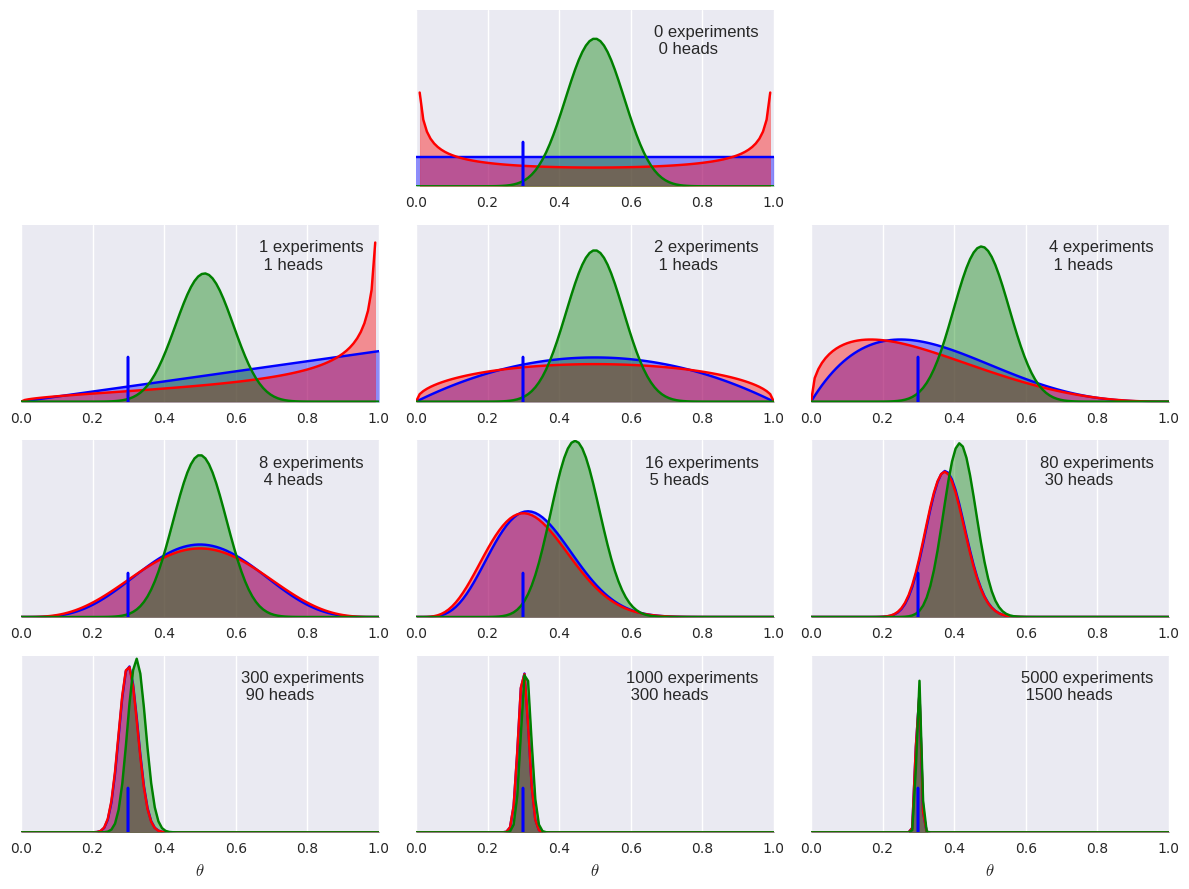

In [52]:
f = pl.figure(figsize=(12,9))
theta_true = 0.3
trials = [0, 1, 2, 4, 8, 16, 80, 300, 1000, 5000]
data = [0, 1, 1, 1, 4, 5, 30, 90, 300, 1500]
beta_prior_params = [(1, 1), (0.5, 0.5), (20, 20)]
dist = stats.beta
x = np.linspace(0, 1, 100)
for idx, N in enumerate(trials):
    if idx == 0:
        pl.subplot(4, 3, 2)
    else:
        pl.subplot(4, 3, idx + 3)
    y = data[idx]
    for (a_prior, b_prior), c in zip(beta_prior_params, ('b', 'r', 'g')):
        p_t_gv_y = dist(a_prior+y, b_prior + N-y).pdf(x)
        pl.plot(x,p_t_gv_y,c)
        pl.fill_between(x, 0,p_t_gv_y, color=c, alpha=0.4)
        pl.axvline(theta_true,ymax=0.25)
    pl.plot(0, 0, label="%d experiments\n %d heads" % (N, y), alpha=0)
    pl.legend(fontsize=12)
    pl.gca().axes.get_yaxis().set_visible(False)
    if idx >=7:
        pl.xlabel(r'$\theta$', fontsize=12)
pl.tight_layout()

In [ ]:
dist()